## CSCE 550 Project3

### Importing the required libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

### Importing the dataset as a dataframe

In [2]:
def loadData(fileName, colNames):
    wine_quality_df = pd.read_csv(fileName,names=colNames,skiprows=14)
    return wine_quality_df

### Building and training KNN model

In [3]:
def knn(k, X_train,y_train ):
    #Creating an instance of KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fitting the data to the model
    knn.fit(X_train, y_train)
    return knn

###  Cross Validation

In [4]:
def knnCrossValidation(k,T,X,y):
    scores = cross_val_score(k, X, y, cv=T, scoring='accuracy')
    print('Accuracies of each fold',scores)
    print("Accuracy by Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Performing Grid Search

In [5]:
def knnGridSearch(T,R1,R2,X,y):
    #create new a knn model
    knn2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(R1, R2+1)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=T,return_train_score=True,n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)
    return knn_gscv

### Comparing Train and Test Accuracy 

In [6]:
def plotGridSearchResults(scores):
    pd.DataFrame(scores)
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_n_neighbors"], scores["mean_train_score"], label="train accuracy")
    plt.plot(scores["param_n_neighbors"], scores["mean_test_score"], label="test accuracy")
    plt.xlabel("param_n_neighbors")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### Main Function

In [7]:
def __main__(k,T,R1,R2):
    fileName = "wine_quality.csv"
    colNames = ["fixedacid","volacid","citricacid","residualsugar","chlorides","freesulfur","totalsulfur","density","pH","sulphates","alcohol","quality"]
    df = loadData(fileName,colNames)
    #Checking the data
    print(df.head())
    #Checking the columns of the data
    df.dropna(thresh=None,axis=0,inplace=True)
    print(df.isna().sum())
    #Removing outliers because test train split has to be done based on stratify=y
    df = df[df.quality != 0]
    df = df[df.quality != 11]
    df["quality"].value_counts()
    #Deriving the data and target for model building
    X = df.drop("quality", axis=1)
    y = df["quality"]
    #Splitting the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123,stratify=y) 
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test))
    knn1 = knn(k, X_train, y_train)
    #Predicting the output
    y_pred = knn1.predict(X_test)
    print('Accuracy by predict:',accuracy_score(y_test, y_pred) * 100)
    #Accuracy score
    print('Accuracy by KNN:',knn1.score(X_test, y_test) * 100)
    #CrossValidation
    knnCrossValidation(knn1,T, X_train, y_train)
    #KNN GrideSearch
    sc = StandardScaler()
    X=sc.fit_transform(X)
    #knn_gscv = knnGridSearch(T,R1,R2, X, y)
    knn_gscv = knnGridSearch(T,R1,R2, X_train, y_train)
    #Check top performing n_neighbors value
    print('Best K:',knn_gscv.best_params_)
    #check mean score for the top performing value of n_neighbors
    print('Accuracy by optimize k:',knn_gscv.best_score_ * 100)
    scores = knn_gscv.cv_results_
    plotGridSearchResults(scores)

   fixedacid  volacid  citricacid  residualsugar  chlorides  freesulfur  \
0        7.0     0.27        0.36           20.7      0.045        45.0   
1        7.2     0.23        0.32            8.5      0.058        47.0   
2        7.2     0.23        0.32            8.5      0.058        47.0   
3        7.0     0.27        0.36           20.7      0.045        45.0   
4        6.3     0.30        0.34            1.6      0.049        14.0   

   totalsulfur  density    pH  sulphates  alcohol  quality  
0        170.0   1.0010  3.00       0.45      8.8      6.0  
1        186.0   0.9956  3.19       0.40      9.9      6.0  
2        186.0   0.9956  3.19       0.40      9.9      6.0  
3        170.0   1.0010  3.00       0.45      8.8      6.0  
4        132.0   0.9940  3.30       0.49      9.5      6.0  
fixedacid        0
volacid          0
citricacid       0
residualsugar    0
chlorides        0
freesulfur       0
totalsulfur      0
density          0
pH               0
sulphates   

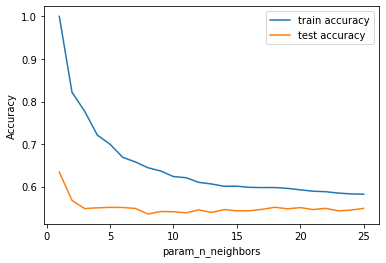

In [8]:
__main__(4,10,1,25)